### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [2]:
# function to check overlap:
#def sharedperc(success, feature):
#    for i in range(len(success)):
        

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns= ['EIN','NAME','SPECIAL_CONSIDERATIONS','ASK_AMT'], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,1


In [4]:
# Determine the number of unique values in each column.
application_list = application_df.dtypes[application_df.dtypes != "NULL"].index.tolist()
application_df[application_list].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
STATUS               2
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

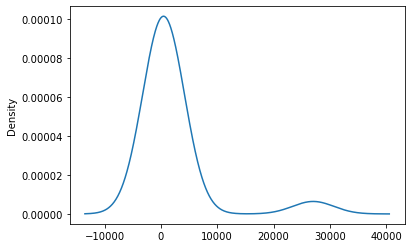

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

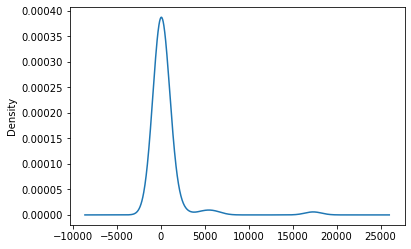

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_counts[classification_counts < 300].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#merged_col = merged_df.columns.values.tolist()
#print(merged_col)

In [14]:
# Merge one-hot encoded features and drop the originals
temp_to_merge_df= pd.DataFrame().assign(STATUS=application_df['STATUS'], 
                                        IS_SUCCESSFUL=application_df['IS_SUCCESSFUL'])
merged_df = pd.concat([temp_to_merge_df, encode_df], axis=1, join='inner')
merged_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
merged_col = merged_df.columns.values.tolist()
print(merged_col)

['STATUS', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent', 'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev', 'ORGANIZATION_Association', 'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M']


In [16]:
coltodrop = []
for column in merged_col:
    #dataxtab = pd.crosstab(merged_df[column],merged_df['IS_SUCCESSFUL'],margins = False)
    #print(dataxtab)
    #dataxtab.plot.bar(stacked=True)
    #plt.legend(title='IS_SUCCESSFUL')
    #plt.show()
    #dataxtab = pd.crosstab(merged_df[column],merged_df['IS_SUCCESSFUL'],margins = False, normalize = 'index')
    #print(dataxtab)
    corrr = np.corrcoef(merged_df[column],merged_df['IS_SUCCESSFUL'])
    corrrr = abs(corrr[1,0])
    if corrrr < .01:
        #print(corrrr)
        coltodrop.append(column)
print(coltodrop)
coltodrop.append('IS_SUCCESSFUL')

['STATUS', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T7', 'AFFILIATION_Family/Parent', 'AFFILIATION_National', 'AFFILIATION_Regional', 'CLASSIFICATION_C2000', 'USE_CASE_Other', 'INCOME_AMT_5M-10M']


In [17]:
# Kill the noise
for col in coltodrop:
    merged_df.drop([col],1).values

In [18]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Refinement of the Model

In [24]:
victory_message = "WOOOOOOOO YEEEAAAAH BABYYY THAT'S WHAT IVE BEEN WAITING FOR!"
activation_list = ['relu','tanh']
value_list = range(60,90,10)
r_value_list = range(90,110,10)
number_input_features = len(X_train[0])
class bestest_model:
    model_accuracy = 0
    neuron_array = []
    activation_array = []
    layer_count = len(neuron_array)
for layer1 in r_value_list:
    for layer2 in value_list:
        for layer3 in value_list:
            for layer4 in value_list:
                for act1 in activation_list:
                    for act2 in activation_list:
                        for act3 in activation_list:
                            for act4 in activation_list:
                                temp_neuron_array = []
                                temp_activation_array = []
                                temp_neuron_array.append(layer1)
                                temp_activation_array.append(act1)
                                temp_neuron_array.append(layer2)
                                temp_activation_array.append(act2)
                                temp_neuron_array.append(layer3)
                                temp_activation_array.append(act3)
                                temp_neuron_array.append(layer4)
                                temp_activation_array.append(act4)
                                nn = tf.keras.models.Sequential()
                                nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=act1))
                                nn.add(tf.keras.layers.Dense(units=layer2, activation=act2))
                                nn.add(tf.keras.layers.Dense(units=layer3, activation=act3))
                                nn.add(tf.keras.layers.Dense(units=layer4, activation=act4))
                                nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
                                nn.summary()
                                nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
                                fit_model = nn.fit(X_train,y_train,epochs=5,verbose=0)
                                model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
                                print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
                                if model_accuracy > bestest_model.model_accuracy:
                                    bestest_model.neuron_array = temp_neuron_array
                                    bestest_model.activation_array = temp_activation_array
                                    bestest_model.model_accuracy = model_accuracy
                                    bestest_model.layer_count = len(bestest_model.neuron_array)
                                    print("new best model")
                                else:
                                    print("Oh bother")
                                print('*'*75)
                                if model_accuracy > .75:
                                    break
                            if model_accuracy > .75:
                                break
                        if model_accuracy > .75:
                            break
                    if model_accuracy > .75:
                        break
                if model_accuracy > .75:
                    break
            if model_accuracy > .75:
                break
        if model_accuracy > .75:
            break
    if model_accuracy > .75:
        break
def display_model_stats (model):
    print(model.neuron_array)
    print(model.activation_array)
    print(model.model_accuracy)
    print(model.layer_count)
print("best model stats:")
display_model_stats(bestest_model)

Model: "sequential_1041"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5205 (Dense)          (None, 90)                3780      
                                                                 
 dense_5206 (Dense)          (None, 60)                5460      
                                                                 
 dense_5207 (Dense)          (None, 60)                3660      
                                                                 
 dense_5208 (Dense)          (None, 60)                3660      
                                                                 
 dense_5209 (Dense)          (None, 1)                 61        
                                                                 
Total params: 16,621
Trainable params: 16,621
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8169 - accuracy: 0.6990 

                                                                 
 dense_5237 (Dense)          (None, 60)                3660      
                                                                 
 dense_5238 (Dense)          (None, 60)                3660      
                                                                 
 dense_5239 (Dense)          (None, 1)                 61        
                                                                 
Total params: 16,621
Trainable params: 16,621
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6451 - accuracy: 0.7027 - 286ms/epoch - 1ms/step
Loss: 0.6451314091682434, Accuracy: 0.7027405500411987
Oh bother
***************************************************************************
Model: "sequential_1048"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5240 (Dense)          (No

Total params: 16,621
Trainable params: 16,621
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6243 - accuracy: 0.6967 - 262ms/epoch - 978us/step
Loss: 0.6242883801460266, Accuracy: 0.6966763734817505
Oh bother
***************************************************************************
Model: "sequential_1054"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5270 (Dense)          (None, 90)                3780      
                                                                 
 dense_5271 (Dense)          (None, 60)                5460      
                                                                 
 dense_5272 (Dense)          (None, 60)                3660      
                                                                 
 dense_5273 (Dense)          (None, 60)                3660      
                              

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5300 (Dense)          (None, 90)                3780      
                                                                 
 dense_5301 (Dense)          (None, 60)                5460      
                                                                 
 dense_5302 (Dense)          (None, 60)                3660      
                                                                 
 dense_5303 (Dense)          (None, 70)                4270      
                                                                 
 dense_5304 (Dense)          (None, 1)                 71        
                                                                 
Total params: 17,241
Trainable params: 17,241
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6935 - accuracy: 0.6990 - 275ms/epoch - 1ms/step


 dense_5332 (Dense)          (None, 60)                3660      
                                                                 
 dense_5333 (Dense)          (None, 70)                4270      
                                                                 
 dense_5334 (Dense)          (None, 1)                 71        
                                                                 
Total params: 17,241
Trainable params: 17,241
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7078 - accuracy: 0.6878 - 277ms/epoch - 1ms/step
Loss: 0.7077940702438354, Accuracy: 0.687813401222229
Oh bother
***************************************************************************
Model: "sequential_1067"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5335 (Dense)          (None, 90)                3780      
                                 

Total params: 17,241
Trainable params: 17,241
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5799 - accuracy: 0.7080 - 273ms/epoch - 1ms/step
Loss: 0.5799022912979126, Accuracy: 0.7079883217811584
Oh bother
***************************************************************************
Model: "sequential_1073"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5365 (Dense)          (None, 90)                3780      
                                                                 
 dense_5366 (Dense)          (None, 60)                5460      
                                                                 
 dense_5367 (Dense)          (None, 60)                3660      
                                                                 
 dense_5368 (Dense)          (None, 80)                4880      
                                

 Layer (type)                Output Shape              Param #   
 dense_5395 (Dense)          (None, 90)                3780      
                                                                 
 dense_5396 (Dense)          (None, 60)                5460      
                                                                 
 dense_5397 (Dense)          (None, 60)                3660      
                                                                 
 dense_5398 (Dense)          (None, 80)                4880      
                                                                 
 dense_5399 (Dense)          (None, 1)                 81        
                                                                 
Total params: 17,861
Trainable params: 17,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6829 - accuracy: 0.7230 - 280ms/epoch - 1ms/step
Loss: 0.6828747987747192, Accuracy: 0.7230320572853088
Oh bother
*

                                                                 
 dense_5428 (Dense)          (None, 80)                4880      
                                                                 
 dense_5429 (Dense)          (None, 1)                 81        
                                                                 
Total params: 17,861
Trainable params: 17,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6188 - accuracy: 0.7017 - 290ms/epoch - 1ms/step
Loss: 0.6187974810600281, Accuracy: 0.7016909718513489
Oh bother
***************************************************************************
Model: "sequential_1086"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5430 (Dense)          (None, 90)                3780      
                                                                 
 dense_5431 (Dense)          (No

Trainable params: 17,831
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8416 - accuracy: 0.6504 - 264ms/epoch - 986us/step
Loss: 0.8416263461112976, Accuracy: 0.6503790020942688
Oh bother
***************************************************************************
Model: "sequential_1092"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5460 (Dense)          (None, 90)                3780      
                                                                 
 dense_5461 (Dense)          (None, 60)                5460      
                                                                 
 dense_5462 (Dense)          (None, 70)                4270      
                                                                 
 dense_5463 (Dense)          (None, 60)                4260      
                                                   

 Layer (type)                Output Shape              Param #   
 dense_5490 (Dense)          (None, 90)                3780      
                                                                 
 dense_5491 (Dense)          (None, 60)                5460      
                                                                 
 dense_5492 (Dense)          (None, 70)                4270      
                                                                 
 dense_5493 (Dense)          (None, 60)                4260      
                                                                 
 dense_5494 (Dense)          (None, 1)                 61        
                                                                 
Total params: 17,831
Trainable params: 17,831
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6653 - accuracy: 0.7275 - 269ms/epoch - 1ms/step
Loss: 0.66525799036026, Accuracy: 0.7274635434150696
Oh bother
***

                                                                 
 dense_5523 (Dense)          (None, 60)                4260      
                                                                 
 dense_5524 (Dense)          (None, 1)                 61        
                                                                 
Total params: 17,831
Trainable params: 17,831
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5819 - accuracy: 0.7210 - 274ms/epoch - 1ms/step
Loss: 0.5818530917167664, Accuracy: 0.7210495471954346
Oh bother
***************************************************************************
Model: "sequential_1105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5525 (Dense)          (None, 90)                3780      
                                                                 
 dense_5526 (Dense)          (No

Trainable params: 18,551
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6862 - accuracy: 0.6461 - 288ms/epoch - 1ms/step
Loss: 0.6861890554428101, Accuracy: 0.6460641622543335
Oh bother
***************************************************************************
Model: "sequential_1111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5555 (Dense)          (None, 90)                3780      
                                                                 
 dense_5556 (Dense)          (None, 60)                5460      
                                                                 
 dense_5557 (Dense)          (None, 70)                4270      
                                                                 
 dense_5558 (Dense)          (None, 70)                4970      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_5585 (Dense)          (None, 90)                3780      
                                                                 
 dense_5586 (Dense)          (None, 60)                5460      
                                                                 
 dense_5587 (Dense)          (None, 70)                4270      
                                                                 
 dense_5588 (Dense)          (None, 70)                4970      
                                                                 
 dense_5589 (Dense)          (None, 1)                 71        
                                                                 
Total params: 18,551
Trainable params: 18,551
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6067 - accuracy: 0.7236 - 283ms/epoch - 1ms/step
Loss: 0.6066918969154358, Accuracy: 0.7236151695251465
Oh bother
*

                                                                 
 dense_5618 (Dense)          (None, 80)                5680      
                                                                 
 dense_5619 (Dense)          (None, 1)                 81        
                                                                 
Total params: 19,271
Trainable params: 19,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7831 - accuracy: 0.6366 - 266ms/epoch - 994us/step
Loss: 0.7831178307533264, Accuracy: 0.6366180777549744
Oh bother
***************************************************************************
Model: "sequential_1124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5620 (Dense)          (None, 90)                3780      
                                                                 
 dense_5621 (Dense)          (

Trainable params: 19,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7152 - accuracy: 0.6573 - 259ms/epoch - 967us/step
Loss: 0.7151867747306824, Accuracy: 0.657259464263916
Oh bother
***************************************************************************
Model: "sequential_1130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5650 (Dense)          (None, 90)                3780      
                                                                 
 dense_5651 (Dense)          (None, 60)                5460      
                                                                 
 dense_5652 (Dense)          (None, 70)                4270      
                                                                 
 dense_5653 (Dense)          (None, 80)                5680      
                                                    

 Layer (type)                Output Shape              Param #   
 dense_5680 (Dense)          (None, 90)                3780      
                                                                 
 dense_5681 (Dense)          (None, 60)                5460      
                                                                 
 dense_5682 (Dense)          (None, 70)                4270      
                                                                 
 dense_5683 (Dense)          (None, 80)                5680      
                                                                 
 dense_5684 (Dense)          (None, 1)                 81        
                                                                 
Total params: 19,271
Trainable params: 19,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6060 - accuracy: 0.6939 - 276ms/epoch - 1ms/step
Loss: 0.6059725880622864, Accuracy: 0.6938775777816772
Oh bother
*

                                                                 
 dense_5713 (Dense)          (None, 60)                4860      
                                                                 
 dense_5714 (Dense)          (None, 1)                 61        
                                                                 
Total params: 19,041
Trainable params: 19,041
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6821 - accuracy: 0.6784 - 282ms/epoch - 1ms/step
Loss: 0.6820525527000427, Accuracy: 0.6783673763275146
Oh bother
***************************************************************************
Model: "sequential_1143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5715 (Dense)          (None, 90)                3780      
                                                                 
 dense_5716 (Dense)          (No

Trainable params: 19,041
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7344 - accuracy: 0.6568 - 290ms/epoch - 1ms/step
Loss: 0.7343776226043701, Accuracy: 0.6567929983139038
Oh bother
***************************************************************************
Model: "sequential_1149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5745 (Dense)          (None, 90)                3780      
                                                                 
 dense_5746 (Dense)          (None, 60)                5460      
                                                                 
 dense_5747 (Dense)          (None, 80)                4880      
                                                                 
 dense_5748 (Dense)          (None, 60)                4860      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_5775 (Dense)          (None, 90)                3780      
                                                                 
 dense_5776 (Dense)          (None, 60)                5460      
                                                                 
 dense_5777 (Dense)          (None, 80)                4880      
                                                                 
 dense_5778 (Dense)          (None, 70)                5670      
                                                                 
 dense_5779 (Dense)          (None, 1)                 71        
                                                                 
Total params: 19,861
Trainable params: 19,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7998 - accuracy: 0.6391 - 279ms/epoch - 1ms/step
Loss: 0.7997900247573853, Accuracy: 0.6390670537948608
Oh bother
*

                                                                 
 dense_5808 (Dense)          (None, 70)                5670      
                                                                 
 dense_5809 (Dense)          (None, 1)                 71        
                                                                 
Total params: 19,861
Trainable params: 19,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6810 - accuracy: 0.7228 - 268ms/epoch - 1ms/step
Loss: 0.6809802651405334, Accuracy: 0.7227988243103027
Oh bother
***************************************************************************
Model: "sequential_1162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5810 (Dense)          (None, 90)                3780      
                                                                 
 dense_5811 (Dense)          (No

Trainable params: 19,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6051 - accuracy: 0.7034 - 273ms/epoch - 1ms/step
Loss: 0.6051296591758728, Accuracy: 0.703440248966217
Oh bother
***************************************************************************
Model: "sequential_1168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5840 (Dense)          (None, 90)                3780      
                                                                 
 dense_5841 (Dense)          (None, 60)                5460      
                                                                 
 dense_5842 (Dense)          (None, 80)                4880      
                                                                 
 dense_5843 (Dense)          (None, 70)                5670      
                                                      

 Layer (type)                Output Shape              Param #   
 dense_5870 (Dense)          (None, 90)                3780      
                                                                 
 dense_5871 (Dense)          (None, 60)                5460      
                                                                 
 dense_5872 (Dense)          (None, 80)                4880      
                                                                 
 dense_5873 (Dense)          (None, 80)                6480      
                                                                 
 dense_5874 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,681
Trainable params: 20,681
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6798 - accuracy: 0.6434 - 482ms/epoch - 2ms/step
Loss: 0.6798031330108643, Accuracy: 0.6433819532394409
Oh bother
*

                                                                 
 dense_5903 (Dense)          (None, 80)                6480      
                                                                 
 dense_5904 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,681
Trainable params: 20,681
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6518 - accuracy: 0.6945 - 287ms/epoch - 1ms/step
Loss: 0.6518147587776184, Accuracy: 0.6944606304168701
Oh bother
***************************************************************************
Model: "sequential_1181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5905 (Dense)          (None, 90)                3780      
                                                                 
 dense_5906 (Dense)          (No

Trainable params: 18,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7395 - accuracy: 0.7238 - 273ms/epoch - 1ms/step
Loss: 0.7394924759864807, Accuracy: 0.7238484025001526
Oh bother
***************************************************************************
Model: "sequential_1187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5935 (Dense)          (None, 90)                3780      
                                                                 
 dense_5936 (Dense)          (None, 70)                6370      
                                                                 
 dense_5937 (Dense)          (None, 60)                4260      
                                                                 
 dense_5938 (Dense)          (None, 60)                3660      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_5965 (Dense)          (None, 90)                3780      
                                                                 
 dense_5966 (Dense)          (None, 70)                6370      
                                                                 
 dense_5967 (Dense)          (None, 60)                4260      
                                                                 
 dense_5968 (Dense)          (None, 60)                3660      
                                                                 
 dense_5969 (Dense)          (None, 1)                 61        
                                                                 
Total params: 18,131
Trainable params: 18,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6686 - accuracy: 0.7106 - 257ms/epoch - 960us/step
Loss: 0.6686429977416992, Accuracy: 0.7105539441108704
Oh bother

                                                                 
 dense_5998 (Dense)          (None, 60)                3660      
                                                                 
 dense_5999 (Dense)          (None, 1)                 61        
                                                                 
Total params: 18,131
Trainable params: 18,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6035 - accuracy: 0.6861 - 258ms/epoch - 965us/step
Loss: 0.6034537553787231, Accuracy: 0.6860641241073608
Oh bother
***************************************************************************
Model: "sequential_1200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6000 (Dense)          (None, 90)                3780      
                                                                 
 dense_6001 (Dense)          (

Trainable params: 18,751
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7808 - accuracy: 0.6648 - 273ms/epoch - 1ms/step
Loss: 0.7807729840278625, Accuracy: 0.6648396253585815
Oh bother
***************************************************************************
Model: "sequential_1206"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6030 (Dense)          (None, 90)                3780      
                                                                 
 dense_6031 (Dense)          (None, 70)                6370      
                                                                 
 dense_6032 (Dense)          (None, 60)                4260      
                                                                 
 dense_6033 (Dense)          (None, 70)                4270      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6060 (Dense)          (None, 90)                3780      
                                                                 
 dense_6061 (Dense)          (None, 70)                6370      
                                                                 
 dense_6062 (Dense)          (None, 60)                4260      
                                                                 
 dense_6063 (Dense)          (None, 70)                4270      
                                                                 
 dense_6064 (Dense)          (None, 1)                 71        
                                                                 
Total params: 18,751
Trainable params: 18,751
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6174 - accuracy: 0.6913 - 276ms/epoch - 1ms/step
Loss: 0.6173512935638428, Accuracy: 0.6913119554519653
Oh bother
*

                                                                 
 dense_6093 (Dense)          (None, 80)                4880      
                                                                 
 dense_6094 (Dense)          (None, 1)                 81        
                                                                 
Total params: 19,371
Trainable params: 19,371
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7546 - accuracy: 0.7128 - 289ms/epoch - 1ms/step
Loss: 0.7545885443687439, Accuracy: 0.7127696871757507
Oh bother
***************************************************************************
Model: "sequential_1219"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6095 (Dense)          (None, 90)                3780      
                                                                 
 dense_6096 (Dense)          (No

Trainable params: 19,371
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7373 - accuracy: 0.6620 - 291ms/epoch - 1ms/step
Loss: 0.7373249530792236, Accuracy: 0.6620408296585083
Oh bother
***************************************************************************
Model: "sequential_1225"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6125 (Dense)          (None, 90)                3780      
                                                                 
 dense_6126 (Dense)          (None, 70)                6370      
                                                                 
 dense_6127 (Dense)          (None, 60)                4260      
                                                                 
 dense_6128 (Dense)          (None, 80)                4880      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6155 (Dense)          (None, 90)                3780      
                                                                 
 dense_6156 (Dense)          (None, 70)                6370      
                                                                 
 dense_6157 (Dense)          (None, 60)                4260      
                                                                 
 dense_6158 (Dense)          (None, 80)                4880      
                                                                 
 dense_6159 (Dense)          (None, 1)                 81        
                                                                 
Total params: 19,371
Trainable params: 19,371
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6129 - accuracy: 0.7073 - 285ms/epoch - 1ms/step
Loss: 0.6129376292228699, Accuracy: 0.7072886228561401
Oh bother
*

                                                                 
 dense_6188 (Dense)          (None, 60)                4260      
                                                                 
 dense_6189 (Dense)          (None, 1)                 61        
                                                                 
Total params: 19,441
Trainable params: 19,441
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7351 - accuracy: 0.6968 - 284ms/epoch - 1ms/step
Loss: 0.735106885433197, Accuracy: 0.6967930197715759
Oh bother
***************************************************************************
Model: "sequential_1238"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6190 (Dense)          (None, 90)                3780      
                                                                 
 dense_6191 (Dense)          (Non

Trainable params: 19,441
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6208 - accuracy: 0.6864 - 277ms/epoch - 1ms/step
Loss: 0.6207943558692932, Accuracy: 0.6864140033721924
Oh bother
***************************************************************************
Model: "sequential_1244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6220 (Dense)          (None, 90)                3780      
                                                                 
 dense_6221 (Dense)          (None, 70)                6370      
                                                                 
 dense_6222 (Dense)          (None, 70)                4970      
                                                                 
 dense_6223 (Dense)          (None, 60)                4260      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6250 (Dense)          (None, 90)                3780      
                                                                 
 dense_6251 (Dense)          (None, 70)                6370      
                                                                 
 dense_6252 (Dense)          (None, 70)                4970      
                                                                 
 dense_6253 (Dense)          (None, 70)                4970      
                                                                 
 dense_6254 (Dense)          (None, 1)                 71        
                                                                 
Total params: 20,161
Trainable params: 20,161
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7848 - accuracy: 0.7215 - 274ms/epoch - 1ms/step
Loss: 0.784768283367157, Accuracy: 0.7215160131454468
Oh bother
**

                                                                 
 dense_6283 (Dense)          (None, 70)                4970      
                                                                 
 dense_6284 (Dense)          (None, 1)                 71        
                                                                 
Total params: 20,161
Trainable params: 20,161
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6415 - accuracy: 0.7005 - 270ms/epoch - 1ms/step
Loss: 0.6415109038352966, Accuracy: 0.7005248069763184
Oh bother
***************************************************************************
Model: "sequential_1257"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6285 (Dense)          (None, 90)                3780      
                                                                 
 dense_6286 (Dense)          (No

Trainable params: 20,161
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6292 - accuracy: 0.7059 - 282ms/epoch - 1ms/step
Loss: 0.6291955709457397, Accuracy: 0.7058892250061035
Oh bother
***************************************************************************
Model: "sequential_1263"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6315 (Dense)          (None, 90)                3780      
                                                                 
 dense_6316 (Dense)          (None, 70)                6370      
                                                                 
 dense_6317 (Dense)          (None, 70)                4970      
                                                                 
 dense_6318 (Dense)          (None, 70)                4970      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6345 (Dense)          (None, 90)                3780      
                                                                 
 dense_6346 (Dense)          (None, 70)                6370      
                                                                 
 dense_6347 (Dense)          (None, 70)                4970      
                                                                 
 dense_6348 (Dense)          (None, 80)                5680      
                                                                 
 dense_6349 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8439 - accuracy: 0.6926 - 288ms/epoch - 1ms/step
Loss: 0.843941867351532, Accuracy: 0.6925947666168213
Oh bother
**

                                                                 
 dense_6378 (Dense)          (None, 80)                5680      
                                                                 
 dense_6379 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6577 - accuracy: 0.6870 - 305ms/epoch - 1ms/step
Loss: 0.6576947569847107, Accuracy: 0.6869970560073853
Oh bother
***************************************************************************
Model: "sequential_1276"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6380 (Dense)          (None, 90)                3780      
                                                                 
 dense_6381 (Dense)          (No

Trainable params: 20,751
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.0851 - accuracy: 0.7241 - 271ms/epoch - 1ms/step
Loss: 1.0850958824157715, Accuracy: 0.7240816354751587
Oh bother
***************************************************************************
Model: "sequential_1282"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6410 (Dense)          (None, 90)                3780      
                                                                 
 dense_6411 (Dense)          (None, 70)                6370      
                                                                 
 dense_6412 (Dense)          (None, 80)                5680      
                                                                 
 dense_6413 (Dense)          (None, 60)                4860      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6440 (Dense)          (None, 90)                3780      
                                                                 
 dense_6441 (Dense)          (None, 70)                6370      
                                                                 
 dense_6442 (Dense)          (None, 80)                5680      
                                                                 
 dense_6443 (Dense)          (None, 60)                4860      
                                                                 
 dense_6444 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,751
Trainable params: 20,751
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6063 - accuracy: 0.7076 - 274ms/epoch - 1ms/step
Loss: 0.6062828898429871, Accuracy: 0.7076385021209717
Oh bother
*

                                                                 
 dense_6473 (Dense)          (None, 60)                4860      
                                                                 
 dense_6474 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,751
Trainable params: 20,751
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6512 - accuracy: 0.7004 - 280ms/epoch - 1ms/step
Loss: 0.6511677503585815, Accuracy: 0.7004081606864929
Oh bother
***************************************************************************
Model: "sequential_1295"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6475 (Dense)          (None, 90)                3780      
                                                                 
 dense_6476 (Dense)          (No

Trainable params: 21,571
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6894 - accuracy: 0.6864 - 275ms/epoch - 1ms/step
Loss: 0.6893832683563232, Accuracy: 0.6864140033721924
Oh bother
***************************************************************************
Model: "sequential_1301"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6505 (Dense)          (None, 90)                3780      
                                                                 
 dense_6506 (Dense)          (None, 70)                6370      
                                                                 
 dense_6507 (Dense)          (None, 80)                5680      
                                                                 
 dense_6508 (Dense)          (None, 70)                5670      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6535 (Dense)          (None, 90)                3780      
                                                                 
 dense_6536 (Dense)          (None, 70)                6370      
                                                                 
 dense_6537 (Dense)          (None, 80)                5680      
                                                                 
 dense_6538 (Dense)          (None, 70)                5670      
                                                                 
 dense_6539 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,571
Trainable params: 21,571
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6588 - accuracy: 0.6900 - 280ms/epoch - 1ms/step
Loss: 0.6587774753570557, Accuracy: 0.6900291442871094
Oh bother
*

                                                                 
 dense_6568 (Dense)          (None, 80)                6480      
                                                                 
 dense_6569 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,391
Trainable params: 22,391
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.9396 - accuracy: 0.6998 - 269ms/epoch - 1ms/step
Loss: 0.9396169185638428, Accuracy: 0.6998250484466553
Oh bother
***************************************************************************
Model: "sequential_1314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6570 (Dense)          (None, 90)                3780      
                                                                 
 dense_6571 (Dense)          (No

Trainable params: 22,391
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6416 - accuracy: 0.6910 - 295ms/epoch - 1ms/step
Loss: 0.641606867313385, Accuracy: 0.6909620761871338
Oh bother
***************************************************************************
Model: "sequential_1320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6600 (Dense)          (None, 90)                3780      
                                                                 
 dense_6601 (Dense)          (None, 70)                6370      
                                                                 
 dense_6602 (Dense)          (None, 80)                5680      
                                                                 
 dense_6603 (Dense)          (None, 80)                6480      
                                                      

 Layer (type)                Output Shape              Param #   
 dense_6630 (Dense)          (None, 90)                3780      
                                                                 
 dense_6631 (Dense)          (None, 70)                6370      
                                                                 
 dense_6632 (Dense)          (None, 80)                5680      
                                                                 
 dense_6633 (Dense)          (None, 80)                6480      
                                                                 
 dense_6634 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,391
Trainable params: 22,391
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6910 - accuracy: 0.6559 - 277ms/epoch - 1ms/step
Loss: 0.6909798383712769, Accuracy: 0.6558600664138794
Oh bother
*

                                                                 
 dense_6663 (Dense)          (None, 60)                3660      
                                                                 
 dense_6664 (Dense)          (None, 1)                 61        
                                                                 
Total params: 19,641
Trainable params: 19,641
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7245 - accuracy: 0.6681 - 297ms/epoch - 1ms/step
Loss: 0.7244659662246704, Accuracy: 0.6681049466133118
Oh bother
***************************************************************************
Model: "sequential_1333"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6665 (Dense)          (None, 90)                3780      
                                                                 
 dense_6666 (Dense)          (No

Trainable params: 19,641
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6824 - accuracy: 0.6722 - 275ms/epoch - 1ms/step
Loss: 0.6824208498001099, Accuracy: 0.6721866130828857
Oh bother
***************************************************************************
Model: "sequential_1339"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6695 (Dense)          (None, 90)                3780      
                                                                 
 dense_6696 (Dense)          (None, 80)                7280      
                                                                 
 dense_6697 (Dense)          (None, 60)                4860      
                                                                 
 dense_6698 (Dense)          (None, 60)                3660      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6725 (Dense)          (None, 90)                3780      
                                                                 
 dense_6726 (Dense)          (None, 80)                7280      
                                                                 
 dense_6727 (Dense)          (None, 60)                4860      
                                                                 
 dense_6728 (Dense)          (None, 70)                4270      
                                                                 
 dense_6729 (Dense)          (None, 1)                 71        
                                                                 
Total params: 20,261
Trainable params: 20,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.9592 - accuracy: 0.7292 - 259ms/epoch - 968us/step
Loss: 0.9592469930648804, Accuracy: 0.7292128205299377
Oh bother

                                                                 
 dense_6758 (Dense)          (None, 70)                4270      
                                                                 
 dense_6759 (Dense)          (None, 1)                 71        
                                                                 
Total params: 20,261
Trainable params: 20,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6205 - accuracy: 0.7174 - 466ms/epoch - 2ms/step
Loss: 0.6204625964164734, Accuracy: 0.7174344062805176
Oh bother
***************************************************************************
Model: "sequential_1352"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6760 (Dense)          (None, 90)                3780      
                                                                 
 dense_6761 (Dense)          (No

Trainable params: 20,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6259 - accuracy: 0.6854 - 267ms/epoch - 998us/step
Loss: 0.6259387135505676, Accuracy: 0.6853644251823425
Oh bother
***************************************************************************
Model: "sequential_1358"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6790 (Dense)          (None, 90)                3780      
                                                                 
 dense_6791 (Dense)          (None, 80)                7280      
                                                                 
 dense_6792 (Dense)          (None, 60)                4860      
                                                                 
 dense_6793 (Dense)          (None, 70)                4270      
                                                   

 Layer (type)                Output Shape              Param #   
 dense_6820 (Dense)          (None, 90)                3780      
                                                                 
 dense_6821 (Dense)          (None, 80)                7280      
                                                                 
 dense_6822 (Dense)          (None, 60)                4860      
                                                                 
 dense_6823 (Dense)          (None, 80)                4880      
                                                                 
 dense_6824 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8053 - accuracy: 0.7173 - 279ms/epoch - 1ms/step
Loss: 0.8052541017532349, Accuracy: 0.7173177599906921
Oh bother
*

                                                                 
 dense_6853 (Dense)          (None, 80)                4880      
                                                                 
 dense_6854 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6617 - accuracy: 0.7103 - 268ms/epoch - 1ms/step
Loss: 0.661704421043396, Accuracy: 0.7103207111358643
Oh bother
***************************************************************************
Model: "sequential_1371"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6855 (Dense)          (None, 90)                3780      
                                                                 
 dense_6856 (Dense)          (Non

Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5869 - accuracy: 0.7005 - 271ms/epoch - 1ms/step
Loss: 0.5869112014770508, Accuracy: 0.7005248069763184
Oh bother
***************************************************************************
Model: "sequential_1377"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6885 (Dense)          (None, 90)                3780      
                                                                 
 dense_6886 (Dense)          (None, 80)                7280      
                                                                 
 dense_6887 (Dense)          (None, 70)                5670      
                                                                 
 dense_6888 (Dense)          (None, 60)                4260      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_6915 (Dense)          (None, 90)                3780      
                                                                 
 dense_6916 (Dense)          (None, 80)                7280      
                                                                 
 dense_6917 (Dense)          (None, 70)                5670      
                                                                 
 dense_6918 (Dense)          (None, 60)                4260      
                                                                 
 dense_6919 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,051
Trainable params: 21,051
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6205 - accuracy: 0.6699 - 286ms/epoch - 1ms/step
Loss: 0.6204806566238403, Accuracy: 0.6698542237281799
Oh bother
*

                                                                 
 dense_6948 (Dense)          (None, 60)                4260      
                                                                 
 dense_6949 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,051
Trainable params: 21,051
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6396 - accuracy: 0.6829 - 269ms/epoch - 1ms/step
Loss: 0.6395906805992126, Accuracy: 0.682915449142456
Oh bother
***************************************************************************
Model: "sequential_1390"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6950 (Dense)          (None, 90)                3780      
                                                                 
 dense_6951 (Dense)          (Non

Trainable params: 21,771
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7604 - accuracy: 0.6758 - 291ms/epoch - 1ms/step
Loss: 0.7604090571403503, Accuracy: 0.6758017539978027
Oh bother
***************************************************************************
Model: "sequential_1396"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6980 (Dense)          (None, 90)                3780      
                                                                 
 dense_6981 (Dense)          (None, 80)                7280      
                                                                 
 dense_6982 (Dense)          (None, 70)                5670      
                                                                 
 dense_6983 (Dense)          (None, 70)                4970      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7010 (Dense)          (None, 90)                3780      
                                                                 
 dense_7011 (Dense)          (None, 80)                7280      
                                                                 
 dense_7012 (Dense)          (None, 70)                5670      
                                                                 
 dense_7013 (Dense)          (None, 70)                4970      
                                                                 
 dense_7014 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,771
Trainable params: 21,771
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6454 - accuracy: 0.6861 - 270ms/epoch - 1ms/step
Loss: 0.6454353332519531, Accuracy: 0.6860641241073608
Oh bother
*

                                                                 
 dense_7043 (Dense)          (None, 70)                4970      
                                                                 
 dense_7044 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,771
Trainable params: 21,771
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6142 - accuracy: 0.6770 - 284ms/epoch - 1ms/step
Loss: 0.6141875386238098, Accuracy: 0.6769679188728333
Oh bother
***************************************************************************
Model: "sequential_1409"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7045 (Dense)          (None, 90)                3780      
                                                                 
 dense_7046 (Dense)          (No

Trainable params: 22,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6061 - accuracy: 0.7261 - 284ms/epoch - 1ms/step
Loss: 0.606140673160553, Accuracy: 0.726064145565033
Oh bother
***************************************************************************
Model: "sequential_1415"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7075 (Dense)          (None, 90)                3780      
                                                                 
 dense_7076 (Dense)          (None, 80)                7280      
                                                                 
 dense_7077 (Dense)          (None, 70)                5670      
                                                                 
 dense_7078 (Dense)          (None, 80)                5680      
                                                       

 Layer (type)                Output Shape              Param #   
 dense_7105 (Dense)          (None, 90)                3780      
                                                                 
 dense_7106 (Dense)          (None, 80)                7280      
                                                                 
 dense_7107 (Dense)          (None, 70)                5670      
                                                                 
 dense_7108 (Dense)          (None, 80)                5680      
                                                                 
 dense_7109 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,491
Trainable params: 22,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6199 - accuracy: 0.7110 - 266ms/epoch - 994us/step
Loss: 0.6198784112930298, Accuracy: 0.7110204100608826
Oh bother

                                                                 
 dense_7138 (Dense)          (None, 60)                4860      
                                                                 
 dense_7139 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,461
Trainable params: 22,461
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8043 - accuracy: 0.7047 - 275ms/epoch - 1ms/step
Loss: 0.804293155670166, Accuracy: 0.704723060131073
Oh bother
***************************************************************************
Model: "sequential_1428"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7140 (Dense)          (None, 90)                3780      
                                                                 
 dense_7141 (Dense)          (None

Trainable params: 22,461
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7855 - accuracy: 0.6830 - 274ms/epoch - 1ms/step
Loss: 0.7854577898979187, Accuracy: 0.6830320954322815
Oh bother
***************************************************************************
Model: "sequential_1434"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7170 (Dense)          (None, 90)                3780      
                                                                 
 dense_7171 (Dense)          (None, 80)                7280      
                                                                 
 dense_7172 (Dense)          (None, 80)                6480      
                                                                 
 dense_7173 (Dense)          (None, 60)                4860      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7200 (Dense)          (None, 90)                3780      
                                                                 
 dense_7201 (Dense)          (None, 80)                7280      
                                                                 
 dense_7202 (Dense)          (None, 80)                6480      
                                                                 
 dense_7203 (Dense)          (None, 60)                4860      
                                                                 
 dense_7204 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,461
Trainable params: 22,461
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5910 - accuracy: 0.6985 - 278ms/epoch - 1ms/step
Loss: 0.5909597873687744, Accuracy: 0.6985422968864441
Oh bother
*

                                                                 
 dense_7233 (Dense)          (None, 70)                5670      
                                                                 
 dense_7234 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,281
Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8272 - accuracy: 0.6696 - 291ms/epoch - 1ms/step
Loss: 0.8272188305854797, Accuracy: 0.6696209907531738
Oh bother
***************************************************************************
Model: "sequential_1447"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7235 (Dense)          (None, 90)                3780      
                                                                 
 dense_7236 (Dense)          (No

Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6540 - accuracy: 0.7005 - 268ms/epoch - 1ms/step
Loss: 0.6540083289146423, Accuracy: 0.7005248069763184
Oh bother
***************************************************************************
Model: "sequential_1453"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7265 (Dense)          (None, 90)                3780      
                                                                 
 dense_7266 (Dense)          (None, 80)                7280      
                                                                 
 dense_7267 (Dense)          (None, 80)                6480      
                                                                 
 dense_7268 (Dense)          (None, 70)                5670      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7295 (Dense)          (None, 90)                3780      
                                                                 
 dense_7296 (Dense)          (None, 80)                7280      
                                                                 
 dense_7297 (Dense)          (None, 80)                6480      
                                                                 
 dense_7298 (Dense)          (None, 80)                6480      
                                                                 
 dense_7299 (Dense)          (None, 1)                 81        
                                                                 
Total params: 24,101
Trainable params: 24,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7963 - accuracy: 0.6946 - 265ms/epoch - 990us/step
Loss: 0.7962787747383118, Accuracy: 0.6945772767066956
Oh bother

                                                                 
 dense_7328 (Dense)          (None, 80)                6480      
                                                                 
 dense_7329 (Dense)          (None, 1)                 81        
                                                                 
Total params: 24,101
Trainable params: 24,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7649 - accuracy: 0.7179 - 277ms/epoch - 1ms/step
Loss: 0.7648500800132751, Accuracy: 0.7179008722305298
Oh bother
***************************************************************************
Model: "sequential_1466"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7330 (Dense)          (None, 90)                3780      
                                                                 
 dense_7331 (Dense)          (No

Trainable params: 24,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6073 - accuracy: 0.6946 - 297ms/epoch - 1ms/step
Loss: 0.6073368787765503, Accuracy: 0.6945772767066956
Oh bother
***************************************************************************
Model: "sequential_1472"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7360 (Dense)          (None, 90)                3780      
                                                                 
 dense_7361 (Dense)          (None, 80)                7280      
                                                                 
 dense_7362 (Dense)          (None, 80)                6480      
                                                                 
 dense_7363 (Dense)          (None, 80)                6480      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7390 (Dense)          (None, 100)               4200      
                                                                 
 dense_7391 (Dense)          (None, 60)                6060      
                                                                 
 dense_7392 (Dense)          (None, 60)                3660      
                                                                 
 dense_7393 (Dense)          (None, 60)                3660      
                                                                 
 dense_7394 (Dense)          (None, 1)                 61        
                                                                 
Total params: 17,641
Trainable params: 17,641
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7295 - accuracy: 0.6856 - 494ms/epoch - 2ms/step
Loss: 0.7294575572013855, Accuracy: 0.6855976581573486
Oh bother
*

                                                                 
 dense_7423 (Dense)          (None, 60)                3660      
                                                                 
 dense_7424 (Dense)          (None, 1)                 61        
                                                                 
Total params: 17,641
Trainable params: 17,641
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6993 - accuracy: 0.6889 - 264ms/epoch - 984us/step
Loss: 0.6992772221565247, Accuracy: 0.6888629794120789
Oh bother
***************************************************************************
Model: "sequential_1485"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7425 (Dense)          (None, 100)               4200      
                                                                 
 dense_7426 (Dense)          (

Trainable params: 18,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7140 - accuracy: 0.7242 - 262ms/epoch - 979us/step
Loss: 0.7140366435050964, Accuracy: 0.7241982221603394
Oh bother
***************************************************************************
Model: "sequential_1491"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7455 (Dense)          (None, 100)               4200      
                                                                 
 dense_7456 (Dense)          (None, 60)                6060      
                                                                 
 dense_7457 (Dense)          (None, 60)                3660      
                                                                 
 dense_7458 (Dense)          (None, 70)                4270      
                                                   

 Layer (type)                Output Shape              Param #   
 dense_7485 (Dense)          (None, 100)               4200      
                                                                 
 dense_7486 (Dense)          (None, 60)                6060      
                                                                 
 dense_7487 (Dense)          (None, 60)                3660      
                                                                 
 dense_7488 (Dense)          (None, 70)                4270      
                                                                 
 dense_7489 (Dense)          (None, 1)                 71        
                                                                 
Total params: 18,261
Trainable params: 18,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7583 - accuracy: 0.7038 - 278ms/epoch - 1ms/step
Loss: 0.7582834362983704, Accuracy: 0.7037900686264038
Oh bother
*

                                                                 
 dense_7518 (Dense)          (None, 70)                4270      
                                                                 
 dense_7519 (Dense)          (None, 1)                 71        
                                                                 
Total params: 18,261
Trainable params: 18,261
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5812 - accuracy: 0.7061 - 277ms/epoch - 1ms/step
Loss: 0.5811553597450256, Accuracy: 0.7061224579811096
Oh bother
***************************************************************************
Model: "sequential_1504"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7520 (Dense)          (None, 100)               4200      
                                                                 
 dense_7521 (Dense)          (No

Trainable params: 18,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6939 - accuracy: 0.7252 - 276ms/epoch - 1ms/step
Loss: 0.6938831806182861, Accuracy: 0.7252478003501892
Oh bother
***************************************************************************
Model: "sequential_1510"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7550 (Dense)          (None, 100)               4200      
                                                                 
 dense_7551 (Dense)          (None, 60)                6060      
                                                                 
 dense_7552 (Dense)          (None, 60)                3660      
                                                                 
 dense_7553 (Dense)          (None, 80)                4880      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7580 (Dense)          (None, 100)               4200      
                                                                 
 dense_7581 (Dense)          (None, 60)                6060      
                                                                 
 dense_7582 (Dense)          (None, 60)                3660      
                                                                 
 dense_7583 (Dense)          (None, 80)                4880      
                                                                 
 dense_7584 (Dense)          (None, 1)                 81        
                                                                 
Total params: 18,881
Trainable params: 18,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6710 - accuracy: 0.6479 - 272ms/epoch - 1ms/step
Loss: 0.670997142791748, Accuracy: 0.6479300260543823
Oh bother
**

                                                                 
 dense_7613 (Dense)          (None, 60)                4260      
                                                                 
 dense_7614 (Dense)          (None, 1)                 61        
                                                                 
Total params: 18,851
Trainable params: 18,851
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7273 - accuracy: 0.7040 - 277ms/epoch - 1ms/step
Loss: 0.7272605299949646, Accuracy: 0.7040233016014099
Oh bother
***************************************************************************
Model: "sequential_1523"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7615 (Dense)          (None, 100)               4200      
                                                                 
 dense_7616 (Dense)          (No

Trainable params: 18,851
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6678 - accuracy: 0.6145 - 277ms/epoch - 1ms/step
Loss: 0.6678075194358826, Accuracy: 0.6144606471061707
Oh bother
***************************************************************************
Model: "sequential_1529"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7645 (Dense)          (None, 100)               4200      
                                                                 
 dense_7646 (Dense)          (None, 60)                6060      
                                                                 
 dense_7647 (Dense)          (None, 70)                4270      
                                                                 
 dense_7648 (Dense)          (None, 60)                4260      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7675 (Dense)          (None, 100)               4200      
                                                                 
 dense_7676 (Dense)          (None, 60)                6060      
                                                                 
 dense_7677 (Dense)          (None, 70)                4270      
                                                                 
 dense_7678 (Dense)          (None, 60)                4260      
                                                                 
 dense_7679 (Dense)          (None, 1)                 61        
                                                                 
Total params: 18,851
Trainable params: 18,851
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6000 - accuracy: 0.7019 - 281ms/epoch - 1ms/step
Loss: 0.5999980568885803, Accuracy: 0.701924204826355
Oh bother
**

                                                                 
 dense_7708 (Dense)          (None, 70)                4970      
                                                                 
 dense_7709 (Dense)          (None, 1)                 71        
                                                                 
Total params: 19,571
Trainable params: 19,571
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8023 - accuracy: 0.6413 - 270ms/epoch - 1ms/step
Loss: 0.8023027777671814, Accuracy: 0.6412827968597412
Oh bother
***************************************************************************
Model: "sequential_1542"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7710 (Dense)          (None, 100)               4200      
                                                                 
 dense_7711 (Dense)          (No

Trainable params: 19,571
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6378 - accuracy: 0.7094 - 271ms/epoch - 1ms/step
Loss: 0.6377986669540405, Accuracy: 0.7093877792358398
Oh bother
***************************************************************************
Model: "sequential_1548"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7740 (Dense)          (None, 100)               4200      
                                                                 
 dense_7741 (Dense)          (None, 60)                6060      
                                                                 
 dense_7742 (Dense)          (None, 70)                4270      
                                                                 
 dense_7743 (Dense)          (None, 70)                4970      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7770 (Dense)          (None, 100)               4200      
                                                                 
 dense_7771 (Dense)          (None, 60)                6060      
                                                                 
 dense_7772 (Dense)          (None, 70)                4270      
                                                                 
 dense_7773 (Dense)          (None, 80)                5680      
                                                                 
 dense_7774 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,291
Trainable params: 20,291
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7707 - accuracy: 0.7058 - 265ms/epoch - 990us/step
Loss: 0.7706908583641052, Accuracy: 0.7057725787162781
Oh bother

                                                                 
 dense_7803 (Dense)          (None, 80)                5680      
                                                                 
 dense_7804 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,291
Trainable params: 20,291
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7093 - accuracy: 0.6779 - 280ms/epoch - 1ms/step
Loss: 0.7093465924263, Accuracy: 0.6779008507728577
Oh bother
***************************************************************************
Model: "sequential_1561"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7805 (Dense)          (None, 100)               4200      
                                                                 
 dense_7806 (Dense)          (None,

Trainable params: 20,291
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6445 - accuracy: 0.6616 - 285ms/epoch - 1ms/step
Loss: 0.6445456743240356, Accuracy: 0.6615743637084961
Oh bother
***************************************************************************
Model: "sequential_1567"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7835 (Dense)          (None, 100)               4200      
                                                                 
 dense_7836 (Dense)          (None, 60)                6060      
                                                                 
 dense_7837 (Dense)          (None, 70)                4270      
                                                                 
 dense_7838 (Dense)          (None, 80)                5680      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7865 (Dense)          (None, 100)               4200      
                                                                 
 dense_7866 (Dense)          (None, 60)                6060      
                                                                 
 dense_7867 (Dense)          (None, 80)                4880      
                                                                 
 dense_7868 (Dense)          (None, 60)                4860      
                                                                 
 dense_7869 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,061
Trainable params: 20,061
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8699 - accuracy: 0.6610 - 264ms/epoch - 986us/step
Loss: 0.869858980178833, Accuracy: 0.6609912514686584
Oh bother


                                                                 
 dense_7898 (Dense)          (None, 60)                4860      
                                                                 
 dense_7899 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,061
Trainable params: 20,061
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6374 - accuracy: 0.7020 - 270ms/epoch - 1ms/step
Loss: 0.637355387210846, Accuracy: 0.7020407915115356
Oh bother
***************************************************************************
Model: "sequential_1580"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7900 (Dense)          (None, 100)               4200      
                                                                 
 dense_7901 (Dense)          (Non

Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.0021 - accuracy: 0.6604 - 276ms/epoch - 1ms/step
Loss: 1.0020854473114014, Accuracy: 0.6604081392288208
Oh bother
***************************************************************************
Model: "sequential_1586"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7930 (Dense)          (None, 100)               4200      
                                                                 
 dense_7931 (Dense)          (None, 60)                6060      
                                                                 
 dense_7932 (Dense)          (None, 80)                4880      
                                                                 
 dense_7933 (Dense)          (None, 70)                5670      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_7960 (Dense)          (None, 100)               4200      
                                                                 
 dense_7961 (Dense)          (None, 60)                6060      
                                                                 
 dense_7962 (Dense)          (None, 80)                4880      
                                                                 
 dense_7963 (Dense)          (None, 70)                5670      
                                                                 
 dense_7964 (Dense)          (None, 1)                 71        
                                                                 
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6890 - accuracy: 0.6791 - 280ms/epoch - 1ms/step
Loss: 0.6889559030532837, Accuracy: 0.679067075252533
Oh bother
**

                                                                 
 dense_7993 (Dense)          (None, 70)                5670      
                                                                 
 dense_7994 (Dense)          (None, 1)                 71        
                                                                 
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6152 - accuracy: 0.6517 - 277ms/epoch - 1ms/step
Loss: 0.6152063608169556, Accuracy: 0.6516618132591248
Oh bother
***************************************************************************
Model: "sequential_1599"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7995 (Dense)          (None, 100)               4200      
                                                                 
 dense_7996 (Dense)          (No

Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7853 - accuracy: 0.6802 - 286ms/epoch - 1ms/step
Loss: 0.7852810621261597, Accuracy: 0.6802332401275635
Oh bother
***************************************************************************
Model: "sequential_1605"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8025 (Dense)          (None, 100)               4200      
                                                                 
 dense_8026 (Dense)          (None, 60)                6060      
                                                                 
 dense_8027 (Dense)          (None, 80)                4880      
                                                                 
 dense_8028 (Dense)          (None, 80)                6480      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8055 (Dense)          (None, 100)               4200      
                                                                 
 dense_8056 (Dense)          (None, 60)                6060      
                                                                 
 dense_8057 (Dense)          (None, 80)                4880      
                                                                 
 dense_8058 (Dense)          (None, 80)                6480      
                                                                 
 dense_8059 (Dense)          (None, 1)                 81        
                                                                 
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6076 - accuracy: 0.7278 - 275ms/epoch - 1ms/step
Loss: 0.6075964570045471, Accuracy: 0.7278134226799011
Oh bother
*

                                                                 
 dense_8088 (Dense)          (None, 60)                3660      
                                                                 
 dense_8089 (Dense)          (None, 1)                 61        
                                                                 
Total params: 19,251
Trainable params: 19,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.1568 - accuracy: 0.7101 - 279ms/epoch - 1ms/step
Loss: 1.1567754745483398, Accuracy: 0.7100874781608582
Oh bother
***************************************************************************
Model: "sequential_1618"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8090 (Dense)          (None, 100)               4200      
                                                                 
 dense_8091 (Dense)          (No

Trainable params: 19,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6689 - accuracy: 0.7094 - 269ms/epoch - 1ms/step
Loss: 0.6688877940177917, Accuracy: 0.7093877792358398
Oh bother
***************************************************************************
Model: "sequential_1624"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8120 (Dense)          (None, 100)               4200      
                                                                 
 dense_8121 (Dense)          (None, 70)                7070      
                                                                 
 dense_8122 (Dense)          (None, 60)                4260      
                                                                 
 dense_8123 (Dense)          (None, 60)                3660      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8150 (Dense)          (None, 100)               4200      
                                                                 
 dense_8151 (Dense)          (None, 70)                7070      
                                                                 
 dense_8152 (Dense)          (None, 60)                4260      
                                                                 
 dense_8153 (Dense)          (None, 60)                3660      
                                                                 
 dense_8154 (Dense)          (None, 1)                 61        
                                                                 
Total params: 19,251
Trainable params: 19,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6252 - accuracy: 0.6836 - 289ms/epoch - 1ms/step
Loss: 0.6252050399780273, Accuracy: 0.6836151480674744
Oh bother
*

                                                                 
 dense_8183 (Dense)          (None, 70)                4270      
                                                                 
 dense_8184 (Dense)          (None, 1)                 71        
                                                                 
Total params: 19,871
Trainable params: 19,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6760 - accuracy: 0.7187 - 279ms/epoch - 1ms/step
Loss: 0.6759529709815979, Accuracy: 0.7187172174453735
Oh bother
***************************************************************************
Model: "sequential_1637"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8185 (Dense)          (None, 100)               4200      
                                                                 
 dense_8186 (Dense)          (No

Trainable params: 19,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6518 - accuracy: 0.7032 - 269ms/epoch - 1ms/step
Loss: 0.6518307328224182, Accuracy: 0.7032070159912109
Oh bother
***************************************************************************
Model: "sequential_1643"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8215 (Dense)          (None, 100)               4200      
                                                                 
 dense_8216 (Dense)          (None, 70)                7070      
                                                                 
 dense_8217 (Dense)          (None, 60)                4260      
                                                                 
 dense_8218 (Dense)          (None, 70)                4270      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8245 (Dense)          (None, 100)               4200      
                                                                 
 dense_8246 (Dense)          (None, 70)                7070      
                                                                 
 dense_8247 (Dense)          (None, 60)                4260      
                                                                 
 dense_8248 (Dense)          (None, 80)                4880      
                                                                 
 dense_8249 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,491
Trainable params: 20,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.9703 - accuracy: 0.7144 - 279ms/epoch - 1ms/step
Loss: 0.9702881574630737, Accuracy: 0.7144023180007935
Oh bother
*

                                                                 
 dense_8278 (Dense)          (None, 80)                4880      
                                                                 
 dense_8279 (Dense)          (None, 1)                 81        
                                                                 
Total params: 20,491
Trainable params: 20,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7436 - accuracy: 0.7206 - 283ms/epoch - 1ms/step
Loss: 0.7435703277587891, Accuracy: 0.7205830812454224
Oh bother
***************************************************************************
Model: "sequential_1656"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8280 (Dense)          (None, 100)               4200      
                                                                 
 dense_8281 (Dense)          (No

Trainable params: 20,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6288 - accuracy: 0.7240 - 276ms/epoch - 1ms/step
Loss: 0.6288331747055054, Accuracy: 0.7239649891853333
Oh bother
***************************************************************************
Model: "sequential_1662"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8310 (Dense)          (None, 100)               4200      
                                                                 
 dense_8311 (Dense)          (None, 70)                7070      
                                                                 
 dense_8312 (Dense)          (None, 60)                4260      
                                                                 
 dense_8313 (Dense)          (None, 80)                4880      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8340 (Dense)          (None, 100)               4200      
                                                                 
 dense_8341 (Dense)          (None, 70)                7070      
                                                                 
 dense_8342 (Dense)          (None, 70)                4970      
                                                                 
 dense_8343 (Dense)          (None, 60)                4260      
                                                                 
 dense_8344 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,561
Trainable params: 20,561
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7697 - accuracy: 0.6830 - 271ms/epoch - 1ms/step
Loss: 0.7696963548660278, Accuracy: 0.6830320954322815
Oh bother
*

                                                                 
 dense_8373 (Dense)          (None, 60)                4260      
                                                                 
 dense_8374 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,561
Trainable params: 20,561
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6665 - accuracy: 0.7078 - 273ms/epoch - 1ms/step
Loss: 0.6665394306182861, Accuracy: 0.7077550888061523
Oh bother
***************************************************************************
Model: "sequential_1675"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8375 (Dense)          (None, 100)               4200      
                                                                 
 dense_8376 (Dense)          (No

Trainable params: 20,561
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5849 - accuracy: 0.7235 - 278ms/epoch - 1ms/step
Loss: 0.5849357843399048, Accuracy: 0.723498523235321
Oh bother
***************************************************************************
Model: "sequential_1681"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8405 (Dense)          (None, 100)               4200      
                                                                 
 dense_8406 (Dense)          (None, 70)                7070      
                                                                 
 dense_8407 (Dense)          (None, 70)                4970      
                                                                 
 dense_8408 (Dense)          (None, 70)                4970      
                                                      

 Layer (type)                Output Shape              Param #   
 dense_8435 (Dense)          (None, 100)               4200      
                                                                 
 dense_8436 (Dense)          (None, 70)                7070      
                                                                 
 dense_8437 (Dense)          (None, 70)                4970      
                                                                 
 dense_8438 (Dense)          (None, 70)                4970      
                                                                 
 dense_8439 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,281
Trainable params: 21,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6536 - accuracy: 0.7066 - 286ms/epoch - 1ms/step
Loss: 0.6535617709159851, Accuracy: 0.7065889239311218
Oh bother
*

                                                                 
 dense_8468 (Dense)          (None, 70)                4970      
                                                                 
 dense_8469 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,281
Trainable params: 21,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6228 - accuracy: 0.7255 - 290ms/epoch - 1ms/step
Loss: 0.6227728128433228, Accuracy: 0.7254810333251953
Oh bother
***************************************************************************
Model: "sequential_1694"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8470 (Dense)          (None, 100)               4200      
                                                                 
 dense_8471 (Dense)          (No

Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7620 - accuracy: 0.6884 - 303ms/epoch - 1ms/step
Loss: 0.7619906663894653, Accuracy: 0.6883965134620667
Oh bother
***************************************************************************
Model: "sequential_1700"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8500 (Dense)          (None, 100)               4200      
                                                                 
 dense_8501 (Dense)          (None, 70)                7070      
                                                                 
 dense_8502 (Dense)          (None, 70)                4970      
                                                                 
 dense_8503 (Dense)          (None, 80)                5680      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8530 (Dense)          (None, 100)               4200      
                                                                 
 dense_8531 (Dense)          (None, 70)                7070      
                                                                 
 dense_8532 (Dense)          (None, 70)                4970      
                                                                 
 dense_8533 (Dense)          (None, 80)                5680      
                                                                 
 dense_8534 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6933 - accuracy: 0.6989 - 279ms/epoch - 1ms/step
Loss: 0.693270742893219, Accuracy: 0.6988921165466309
Oh bother
**

                                                                 
 dense_8563 (Dense)          (None, 80)                5680      
                                                                 
 dense_8564 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5854 - accuracy: 0.7209 - 285ms/epoch - 1ms/step
Loss: 0.5854299068450928, Accuracy: 0.7209329605102539
Oh bother
***************************************************************************
Model: "sequential_1713"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8565 (Dense)          (None, 100)               4200      
                                                                 
 dense_8566 (Dense)          (No

Trainable params: 21,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6246 - accuracy: 0.7118 - 277ms/epoch - 1ms/step
Loss: 0.624550461769104, Accuracy: 0.7118367552757263
Oh bother
***************************************************************************
Model: "sequential_1719"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8595 (Dense)          (None, 100)               4200      
                                                                 
 dense_8596 (Dense)          (None, 70)                7070      
                                                                 
 dense_8597 (Dense)          (None, 80)                5680      
                                                                 
 dense_8598 (Dense)          (None, 60)                4860      
                                                      

 Layer (type)                Output Shape              Param #   
 dense_8625 (Dense)          (None, 100)               4200      
                                                                 
 dense_8626 (Dense)          (None, 70)                7070      
                                                                 
 dense_8627 (Dense)          (None, 80)                5680      
                                                                 
 dense_8628 (Dense)          (None, 60)                4860      
                                                                 
 dense_8629 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,871
Trainable params: 21,871
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5962 - accuracy: 0.7193 - 282ms/epoch - 1ms/step
Loss: 0.5961816310882568, Accuracy: 0.7193002700805664
Oh bother
*

                                                                 
 dense_8658 (Dense)          (None, 70)                5670      
                                                                 
 dense_8659 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,691
Trainable params: 22,691
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7503 - accuracy: 0.7110 - 278ms/epoch - 1ms/step
Loss: 0.7502993941307068, Accuracy: 0.7110204100608826
Oh bother
***************************************************************************
Model: "sequential_1732"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8660 (Dense)          (None, 100)               4200      
                                                                 
 dense_8661 (Dense)          (No

Trainable params: 22,691
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7070 - accuracy: 0.6884 - 289ms/epoch - 1ms/step
Loss: 0.7069773077964783, Accuracy: 0.6883965134620667
Oh bother
***************************************************************************
Model: "sequential_1738"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8690 (Dense)          (None, 100)               4200      
                                                                 
 dense_8691 (Dense)          (None, 70)                7070      
                                                                 
 dense_8692 (Dense)          (None, 80)                5680      
                                                                 
 dense_8693 (Dense)          (None, 70)                5670      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8720 (Dense)          (None, 100)               4200      
                                                                 
 dense_8721 (Dense)          (None, 70)                7070      
                                                                 
 dense_8722 (Dense)          (None, 80)                5680      
                                                                 
 dense_8723 (Dense)          (None, 70)                5670      
                                                                 
 dense_8724 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,691
Trainable params: 22,691
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5728 - accuracy: 0.7240 - 288ms/epoch - 1ms/step
Loss: 0.5727604627609253, Accuracy: 0.7239649891853333
Oh bother
*

                                                                 
 dense_8753 (Dense)          (None, 80)                6480      
                                                                 
 dense_8754 (Dense)          (None, 1)                 81        
                                                                 
Total params: 23,511
Trainable params: 23,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7045 - accuracy: 0.6978 - 271ms/epoch - 1ms/step
Loss: 0.7045120596885681, Accuracy: 0.697842538356781
Oh bother
***************************************************************************
Model: "sequential_1751"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8755 (Dense)          (None, 100)               4200      
                                                                 
 dense_8756 (Dense)          (Non

Trainable params: 23,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7421 - accuracy: 0.6627 - 285ms/epoch - 1ms/step
Loss: 0.7421429753303528, Accuracy: 0.6627405285835266
Oh bother
***************************************************************************
Model: "sequential_1757"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8785 (Dense)          (None, 100)               4200      
                                                                 
 dense_8786 (Dense)          (None, 70)                7070      
                                                                 
 dense_8787 (Dense)          (None, 80)                5680      
                                                                 
 dense_8788 (Dense)          (None, 80)                6480      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8815 (Dense)          (None, 100)               4200      
                                                                 
 dense_8816 (Dense)          (None, 80)                8080      
                                                                 
 dense_8817 (Dense)          (None, 60)                4860      
                                                                 
 dense_8818 (Dense)          (None, 60)                3660      
                                                                 
 dense_8819 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,861
Trainable params: 20,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6892 - accuracy: 0.7213 - 281ms/epoch - 1ms/step
Loss: 0.6892254948616028, Accuracy: 0.7212827801704407
Oh bother
*

                                                                 
 dense_8848 (Dense)          (None, 60)                3660      
                                                                 
 dense_8849 (Dense)          (None, 1)                 61        
                                                                 
Total params: 20,861
Trainable params: 20,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6816 - accuracy: 0.7198 - 284ms/epoch - 1ms/step
Loss: 0.6816041469573975, Accuracy: 0.7197667360305786
Oh bother
***************************************************************************
Model: "sequential_1770"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8850 (Dense)          (None, 100)               4200      
                                                                 
 dense_8851 (Dense)          (No

Trainable params: 20,861
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5802 - accuracy: 0.7097 - 273ms/epoch - 1ms/step
Loss: 0.5801690220832825, Accuracy: 0.7097375988960266
Oh bother
***************************************************************************
Model: "sequential_1776"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8880 (Dense)          (None, 100)               4200      
                                                                 
 dense_8881 (Dense)          (None, 80)                8080      
                                                                 
 dense_8882 (Dense)          (None, 60)                4860      
                                                                 
 dense_8883 (Dense)          (None, 60)                3660      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_8910 (Dense)          (None, 100)               4200      
                                                                 
 dense_8911 (Dense)          (None, 80)                8080      
                                                                 
 dense_8912 (Dense)          (None, 60)                4860      
                                                                 
 dense_8913 (Dense)          (None, 70)                4270      
                                                                 
 dense_8914 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,481
Trainable params: 21,481
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7526 - accuracy: 0.6128 - 281ms/epoch - 1ms/step
Loss: 0.752574622631073, Accuracy: 0.6128280162811279
Oh bother
**

                                                                 
 dense_8943 (Dense)          (None, 70)                4270      
                                                                 
 dense_8944 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,481
Trainable params: 21,481
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7136 - accuracy: 0.6501 - 272ms/epoch - 1ms/step
Loss: 0.7135962843894958, Accuracy: 0.6501457691192627
Oh bother
***************************************************************************
Model: "sequential_1789"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8945 (Dense)          (None, 100)               4200      
                                                                 
 dense_8946 (Dense)          (No

Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8665 - accuracy: 0.6954 - 289ms/epoch - 1ms/step
Loss: 0.8665004372596741, Accuracy: 0.6953935623168945
Oh bother
***************************************************************************
Model: "sequential_1795"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8975 (Dense)          (None, 100)               4200      
                                                                 
 dense_8976 (Dense)          (None, 80)                8080      
                                                                 
 dense_8977 (Dense)          (None, 60)                4860      
                                                                 
 dense_8978 (Dense)          (None, 80)                4880      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_9005 (Dense)          (None, 100)               4200      
                                                                 
 dense_9006 (Dense)          (None, 80)                8080      
                                                                 
 dense_9007 (Dense)          (None, 60)                4860      
                                                                 
 dense_9008 (Dense)          (None, 80)                4880      
                                                                 
 dense_9009 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6774 - accuracy: 0.7040 - 272ms/epoch - 1ms/step
Loss: 0.6773893237113953, Accuracy: 0.7040233016014099
Oh bother
*

                                                                 
 dense_9038 (Dense)          (None, 80)                4880      
                                                                 
 dense_9039 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5970 - accuracy: 0.6809 - 269ms/epoch - 1ms/step
Loss: 0.597032368183136, Accuracy: 0.6809329390525818
Oh bother
***************************************************************************
Model: "sequential_1808"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9040 (Dense)          (None, 100)               4200      
                                                                 
 dense_9041 (Dense)          (Non

Trainable params: 22,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6457 - accuracy: 0.7236 - 275ms/epoch - 1ms/step
Loss: 0.6456908583641052, Accuracy: 0.7236151695251465
Oh bother
***************************************************************************
Model: "sequential_1814"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9070 (Dense)          (None, 100)               4200      
                                                                 
 dense_9071 (Dense)          (None, 80)                8080      
                                                                 
 dense_9072 (Dense)          (None, 70)                5670      
                                                                 
 dense_9073 (Dense)          (None, 60)                4260      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_9100 (Dense)          (None, 100)               4200      
                                                                 
 dense_9101 (Dense)          (None, 80)                8080      
                                                                 
 dense_9102 (Dense)          (None, 70)                5670      
                                                                 
 dense_9103 (Dense)          (None, 60)                4260      
                                                                 
 dense_9104 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,271
Trainable params: 22,271
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7255 - accuracy: 0.6587 - 298ms/epoch - 1ms/step
Loss: 0.7255478501319885, Accuracy: 0.6586589217185974
Oh bother
*

                                                                 
 dense_9133 (Dense)          (None, 70)                4970      
                                                                 
 dense_9134 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,991
Trainable params: 22,991
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7394 - accuracy: 0.6940 - 288ms/epoch - 1ms/step
Loss: 0.7393857836723328, Accuracy: 0.6939941644668579
Oh bother
***************************************************************************
Model: "sequential_1827"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9135 (Dense)          (None, 100)               4200      
                                                                 
 dense_9136 (Dense)          (No

Trainable params: 22,991
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6837 - accuracy: 0.6661 - 284ms/epoch - 1ms/step
Loss: 0.6836527585983276, Accuracy: 0.6661224365234375
Oh bother
***************************************************************************
Model: "sequential_1833"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9165 (Dense)          (None, 100)               4200      
                                                                 
 dense_9166 (Dense)          (None, 80)                8080      
                                                                 
 dense_9167 (Dense)          (None, 70)                5670      
                                                                 
 dense_9168 (Dense)          (None, 70)                4970      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_9195 (Dense)          (None, 100)               4200      
                                                                 
 dense_9196 (Dense)          (None, 80)                8080      
                                                                 
 dense_9197 (Dense)          (None, 70)                5670      
                                                                 
 dense_9198 (Dense)          (None, 70)                4970      
                                                                 
 dense_9199 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,991
Trainable params: 22,991
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5843 - accuracy: 0.7170 - 274ms/epoch - 1ms/step
Loss: 0.584339439868927, Accuracy: 0.7169679403305054
Oh bother
**

                                                                 
 dense_9228 (Dense)          (None, 80)                5680      
                                                                 
 dense_9229 (Dense)          (None, 1)                 81        
                                                                 
Total params: 23,711
Trainable params: 23,711
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6919 - accuracy: 0.7069 - 271ms/epoch - 1ms/step
Loss: 0.6919155716896057, Accuracy: 0.7069388031959534
Oh bother
***************************************************************************
Model: "sequential_1846"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9230 (Dense)          (None, 100)               4200      
                                                                 
 dense_9231 (Dense)          (No

Trainable params: 23,711
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6673 - accuracy: 0.7005 - 288ms/epoch - 1ms/step
Loss: 0.6672536134719849, Accuracy: 0.7005248069763184
Oh bother
***************************************************************************
Model: "sequential_1852"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9260 (Dense)          (None, 100)               4200      
                                                                 
 dense_9261 (Dense)          (None, 80)                8080      
                                                                 
 dense_9262 (Dense)          (None, 70)                5670      
                                                                 
 dense_9263 (Dense)          (None, 80)                5680      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_9290 (Dense)          (None, 100)               4200      
                                                                 
 dense_9291 (Dense)          (None, 80)                8080      
                                                                 
 dense_9292 (Dense)          (None, 80)                6480      
                                                                 
 dense_9293 (Dense)          (None, 60)                4860      
                                                                 
 dense_9294 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,681
Trainable params: 23,681
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7508 - accuracy: 0.6892 - 305ms/epoch - 1ms/step
Loss: 0.7507539391517639, Accuracy: 0.6892127990722656
Oh bother
*

                                                                 
 dense_9323 (Dense)          (None, 60)                4860      
                                                                 
 dense_9324 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,681
Trainable params: 23,681
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6965 - accuracy: 0.6736 - 279ms/epoch - 1ms/step
Loss: 0.6965166330337524, Accuracy: 0.6735860109329224
Oh bother
***************************************************************************
Model: "sequential_1865"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9325 (Dense)          (None, 100)               4200      
                                                                 
 dense_9326 (Dense)          (No

Trainable params: 23,681
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6079 - accuracy: 0.6788 - 284ms/epoch - 1ms/step
Loss: 0.6078851222991943, Accuracy: 0.6788338422775269
Oh bother
***************************************************************************
Model: "sequential_1871"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9355 (Dense)          (None, 100)               4200      
                                                                 
 dense_9356 (Dense)          (None, 80)                8080      
                                                                 
 dense_9357 (Dense)          (None, 80)                6480      
                                                                 
 dense_9358 (Dense)          (None, 60)                4860      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_9385 (Dense)          (None, 100)               4200      
                                                                 
 dense_9386 (Dense)          (None, 80)                8080      
                                                                 
 dense_9387 (Dense)          (None, 80)                6480      
                                                                 
 dense_9388 (Dense)          (None, 70)                5670      
                                                                 
 dense_9389 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,501
Trainable params: 24,501
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8407 - accuracy: 0.7214 - 285ms/epoch - 1ms/step
Loss: 0.8406540155410767, Accuracy: 0.7213994264602661
Oh bother
*

                                                                 
 dense_9418 (Dense)          (None, 70)                5670      
                                                                 
 dense_9419 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,501
Trainable params: 24,501
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6627 - accuracy: 0.7160 - 286ms/epoch - 1ms/step
Loss: 0.6627384424209595, Accuracy: 0.716035008430481
Oh bother
***************************************************************************
Model: "sequential_1884"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9420 (Dense)          (None, 100)               4200      
                                                                 
 dense_9421 (Dense)          (Non

Trainable params: 25,321
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8833 - accuracy: 0.7050 - 284ms/epoch - 1ms/step
Loss: 0.8833085298538208, Accuracy: 0.7049562931060791
Oh bother
***************************************************************************
Model: "sequential_1890"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9450 (Dense)          (None, 100)               4200      
                                                                 
 dense_9451 (Dense)          (None, 80)                8080      
                                                                 
 dense_9452 (Dense)          (None, 80)                6480      
                                                                 
 dense_9453 (Dense)          (None, 80)                6480      
                                                     

 Layer (type)                Output Shape              Param #   
 dense_9480 (Dense)          (None, 100)               4200      
                                                                 
 dense_9481 (Dense)          (None, 80)                8080      
                                                                 
 dense_9482 (Dense)          (None, 80)                6480      
                                                                 
 dense_9483 (Dense)          (None, 80)                6480      
                                                                 
 dense_9484 (Dense)          (None, 1)                 81        
                                                                 
Total params: 25,321
Trainable params: 25,321
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6523 - accuracy: 0.7099 - 310ms/epoch - 1ms/step
Loss: 0.6523120999336243, Accuracy: 0.709854245185852
Oh bother
**

                                                                 
 dense_9513 (Dense)          (None, 80)                6480      
                                                                 
 dense_9514 (Dense)          (None, 1)                 81        
                                                                 
Total params: 25,321
Trainable params: 25,321
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6306 - accuracy: 0.6725 - 279ms/epoch - 1ms/step
Loss: 0.6305882334709167, Accuracy: 0.6725364327430725
Oh bother
***************************************************************************
Model: "sequential_1903"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9515 (Dense)          (None, 100)               4200      
                                                                 
 dense_9516 (Dense)          (No

In [25]:
bestest_model.n_iterations = 5
bestest_model.iteraccuracy = 0
active_1 = bestest_model.activation_array[0]
active_2 = bestest_model.activation_array[1]
active_3 = bestest_model.activation_array[2]
active_4 = bestest_model.activation_array[3]
layer1 = bestest_model.neuron_array[0]
layer2 = bestest_model.neuron_array[1]
layer3 = bestest_model.neuron_array[2]
layer4 = bestest_model.neuron_array[3]
iterrange = range(10,130,10)
for itera in iterrange:
    print(f"over {itera} epochs")
    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=active_1))
    nn.add(tf.keras.layers.Dense(units=layer2, activation=active_2))
    nn.add(tf.keras.layers.Dense(units=layer3, activation=active_3))
    nn.add(tf.keras.layers.Dense(units=layer4, activation=active_4))
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    nn.summary()
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    fit_model = nn.fit(X_train,y_train,epochs=itera,verbose=0)
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    if model_accuracy > bestest_model.iteraccuracy:
        bestest_model.n_iterations = itera
        print("new best epoch model")
    else:
        print("Oh bother")
    if model_accuracy > .75:
        print("WOOOOOOOOOO YEAAAAHHHH BABBYY THAT'S WHAT I'VE BEEN WAITING FOR! THAT'S WHAT ITS ALL ABOUT. WOOOO!")
        break
    print('*'*75)
display_model_stats(bestest_model)

over 10 epochs
Model: "sequential_1905"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9525 (Dense)          (None, 100)               4200      
                                                                 
 dense_9526 (Dense)          (None, 80)                8080      
                                                                 
 dense_9527 (Dense)          (None, 60)                4860      
                                                                 
 dense_9528 (Dense)          (None, 80)                4880      
                                                                 
 dense_9529 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7962 - ac

 dense_9556 (Dense)          (None, 80)                8080      
                                                                 
 dense_9557 (Dense)          (None, 60)                4860      
                                                                 
 dense_9558 (Dense)          (None, 80)                4880      
                                                                 
 dense_9559 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8390 - accuracy: 0.6592 - 284ms/epoch - 1ms/step
Loss: 0.8389971852302551, Accuracy: 0.6592419743537903
Oh bother
***************************************************************************
over 80 epochs
Model: "sequential_1912"
_________________________________________________________________
 Layer (type)    

In [27]:
bestest_model.n_iterations = 100
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"
active_1 = bestest_model.activation_array[0]
active_2 = bestest_model.activation_array[1]
active_3 = bestest_model.activation_array[2]
active_4 = bestest_model.activation_array[3]
layer1 = bestest_model.neuron_array[0]
layer2 = bestest_model.neuron_array[1]
layer3 = bestest_model.neuron_array[2]
layer4 = bestest_model.neuron_array[3]
iterations = bestest_model.n_iterations
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=active_1))
nn.add(tf.keras.layers.Dense(units=layer2, activation=active_2))
nn.add(tf.keras.layers.Dense(units=layer3, activation=active_3))
nn.add(tf.keras.layers.Dense(units=layer4, activation=active_4))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cp_callback = ModelCheckpoint(filepath= checkpoint_path, verbose= 1, save_weights_only= True, save_freq= 'epoch', period= 5)
fit_model = nn.fit(X_train_scaled, y_train, epochs=iterations, callbacks= [cp_callback])
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
nn.save("../SaveMe/AlphabetSoupCharity_Optimization2.h5")

Model: "sequential_1918"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9590 (Dense)          (None, 100)               4200      
                                                                 
 dense_9591 (Dense)          (None, 80)                8080      
                                                                 
 dense_9592 (Dense)          (None, 60)                4860      
                                                                 
 dense_9593 (Dense)          (None, 80)                4880      
                                                                 
 dense_9594 (Dense)          (None, 1)                 81        
                                                                 
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==========================

765/804 [===========================>..] - ETA: 0s - loss: 0.5376 - accuracy: 0.7366
Epoch 55: saving model to checkpoints2\weights.55.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7372
Epoch 56/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7362
Epoch 57/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7365
Epoch 58/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7373
Epoch 59/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7372
Epoch 60/100
787/804 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7355
Epoch 60: saving model to checkpoints2\weights.60.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7362
Epoch 61/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7370
Epoch 62/100
804/80

In [28]:
nn.save("../SaveMe/AlphabetSoupCharity_Optimization2.h5")